In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\AMAN SINGH\Downloads\crop_yield.csv")

In [4]:
df.head()

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909

In [5]:
df.tail()

Crop  Crop_Year       Season              State      Area  \
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
19684        2000           1498.0    395200.00    1160.00  0.500000  
19685        3000           1498.0     98800.00     290.00  3.000000  
19686      440900           1356.2  29586735.11   96373.73  1.285000  
19687        5488           1356.2  26242746.82   85481.26  0.016667  
19688      392160           1356.2  22778368.48   74196.64  1.261818

In [6]:
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (19689, 10)


In [7]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [9]:
# to check the unique values
for i in df.columns:
    print("******************************",i,"*********************************")
    print()
    print(set(df[i].tolist()))
    print()

****************************** Crop *********************************

{'Onion', 'Rapeseed &Mustard', 'Horse-gram', 'Groundnut', 'Gram', 'Small millets', 'Rice', 'Cashewnut', 'Barley', 'Coconut ', 'Arecanut', 'Moth', 'Masoor', 'Oilseeds total', 'Other Summer Pulses', 'Other  Rabi pulses', 'Sannhamp', 'Urad', 'Jute', 'Cotton(lint)', 'Guar seed', 'Peas & beans (Pulses)', 'Sweet potato', 'Niger seed', 'Soyabean', 'Other Cereals', 'Sunflower', 'Cowpea(Lobia)', 'Castor seed', 'Mesta', 'Potato', 'Tapioca', 'Ragi', 'other oilseeds', 'Cardamom', 'Turmeric', 'Tobacco', 'Dry chillies', 'Sugarcane', 'Ginger', 'Garlic', 'Safflower', 'Arhar/Tur', 'Maize', 'Khesari', 'Jowar', 'Moong(Green Gram)', 'Other Kharif pulses', 'Linseed', 'Bajra', 'Coriander', 'Banana', 'Wheat', 'Black pepper', 'Sesamum'}

****************************** Crop_Year *********************************

{1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 20

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  
count  1.968900e+04  1.968900e+04  19689.000000  
mean   2.410331e+07  4.884835e+04     79.954009  
std    9.494600e+07  2.132874e+05    878.306193  
min    5.417000e+01  9.000000e-02      0.000000  
25%    1.880146e+05  3.567000e+02      0.600000  
50%    1.234957e+06  2.421900e+03      1.030000  
75%    1.000385e+07  2.004170e+04      2.388889  
max    4.835407e+09  1.575051e+07  21105.000000

<function matplotlib.pyplot.show(close=None, block=None)>

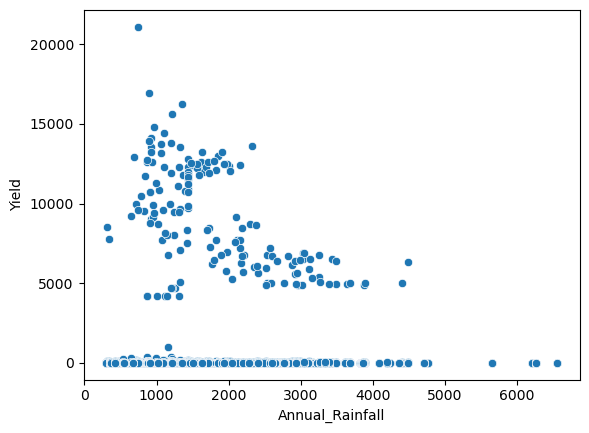

In [12]:
sns.scatterplot(x = df['Annual_Rainfall'], y = df['Yield'])
plt.show

In [13]:
df_year = df[df['Crop_Year']!=2020]

In [14]:
year_yield = df_year.groupby('Crop_Year').sum() 
year_yield

Crop  \
Crop_Year                                                      
1997       ArecanutArhar/TurCastor seedCoconut Cotton(lin...   
1998       ArecanutBajraBlack pepperCorianderCotton(lint)...   
1999       ArecanutArhar/TurBananaCastor seedCoconut Cott...   
2000       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2001       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2002       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2003       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2004       ArecanutArhar/TurBajraBajraBajraBananaBlack pe...   
2005       ArecanutArhar/TurBajraBajraBananaCashewnutCast...   
2006       ArecanutArecanutBananaBlack pepperCotton(lint)...   
2007       ArecanutBajraBananaBlack pepperCoconut Coriand...   
2008       ArecanutBajraBajraBananaBlack pepperCashewnutC...   
2009       ArecanutBajraBajraBananaBlack pepperCashewnutC...   
2010       ArecanutBajraBajraBananaBlack pepperCashewnutC...   
2011       ArecanutBajraBajraBananaBlack pepperCashewnutC...   
2012       ArecanutArhar/TurBajraBajraCashewnutCastor see...   
2013       ArecanutArhar/TurArhar/TurBajraBajraBananaBlac...   
2014       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2015       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2016       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2017       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2018       ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
2019       ArecanutArhar/TurArhar/TurBajraBajraBananaBlac...   

                                                      Season  \
Crop_Year                                                      
1997       Whole Year Kharif     Kharif     Whole Year Kh...   
1998       Kharif     Kharif     Kharif     Kharif     Su...   
1999       Whole Year Kharif     Whole Year Kharif     Wh...   
2000       Whole Year Kharif     Rabi       Kharif     Ra...   
2001       Whole Year Kharif     Rabi       Kharif     Ra...   
2002       Whole Year Kharif     Rabi       Kharif     Ra...   
2003       Whole Year Kharif     Rabi       Kharif     Ra...   
2004       Whole Year Kharif     Kharif     Rabi       Su...   
2005       Whole Year Kharif     Kharif     Rabi       Wh...   
2006       Kharif     Whole Year Kharif     Kharif     Su...   
2007       Kharif     Kharif     Kharif     Kharif     Wh...   
2008       Kharif     Kharif     Summer     Kharif     Kh...   
2009       Kharif     Kharif     Summer     Kharif     Kh...   
2010       Kharif     Kharif     Summer     Kharif     Kh...   
2011       Kharif     Kharif     Summer     Kharif     Kh...   
2012       Kharif     Kharif     Kharif     Rabi       Kh...   
2013       Kharif     Kharif     Rabi       Kharif     Ra...   
2014       Kharif     Kharif     Rabi       Kharif     Ra...   
2015       Kharif     Kharif     Rabi       Kharif     Ra...   
2016       Kharif     Kharif     Rabi       Kharif     Ra...   
2017       Kharif     Kharif     Rabi       Kharif     Ra...   
2018       Kharif     Kharif     Rabi       Kharif     Ra...   
2019       Kharif     Kharif     Rabi       Kharif     Ra...   

                                                       State          Area  \
Crop_Year                                                                    
1997       AssamAssamAssamAssamAssamAssamAssamAssamAssamA...  1.660686e+08   
1998       PuducherryPuducherryPuducherryPuducherryPuduch...  1.501238e+08   
1999       AssamAssamAssamAssamAssamAssamAssamAssamAssamA...  1.470574e+08   
2000       Andhra PradeshAndhra PradeshAndhra PradeshAndh...  1.475277e+08   
2001       Andhra PradeshAndhra PradeshAndhra PradeshAndh...  1.456943e+08   
2002       Andhra PradeshAndhra PradeshAndhra PradeshAndh...  1.427858e+08   
2003       Andhra PradeshAndhra PradeshAndhra PradeshAndh...  1.496968e+08   
2004       KarnatakaKarnatakaKarnatakaKarnatakaKarnatakaK...  1.480245e+08   
2005       Andhra PradeshAndhra PradeshAndhra PradeshAndh...  1.479183e+08

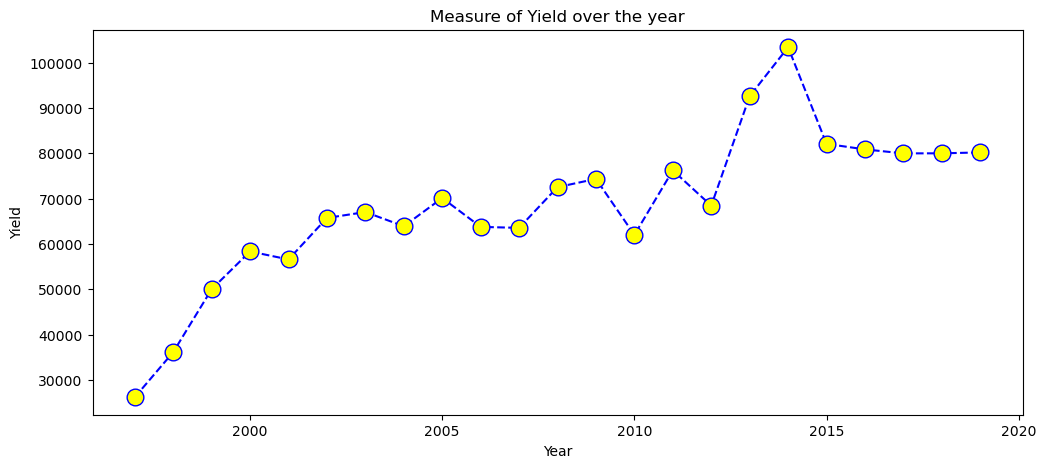

In [15]:
plt.figure(figsize = (12,5))
plt.plot(year_yield.index, year_yield['Yield'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

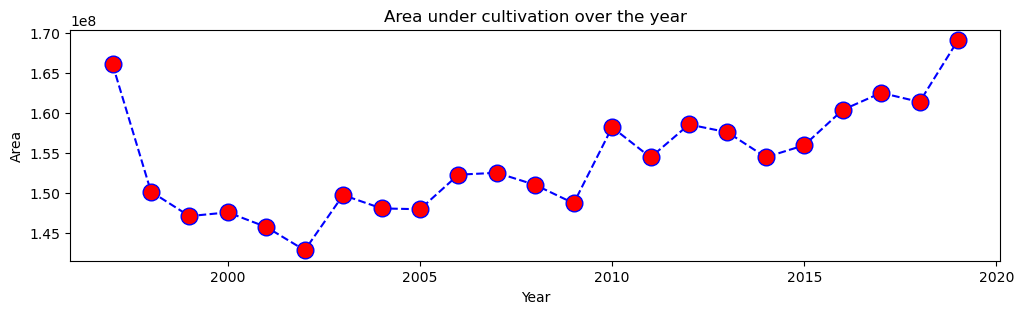

In [16]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Area'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='red')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Area under cultivation over the year')
plt.show()

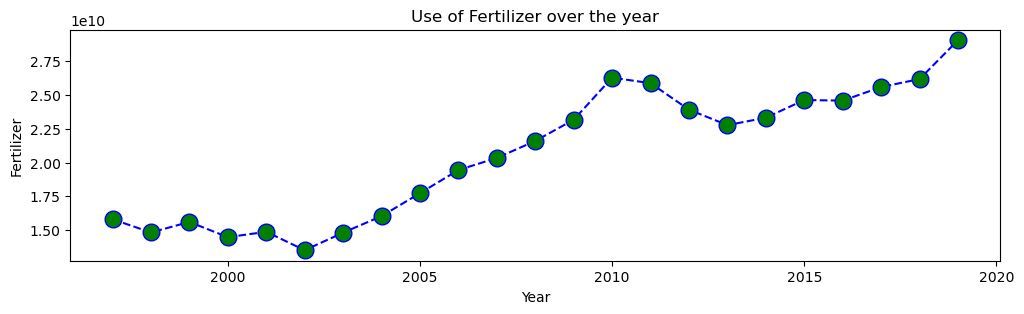

In [17]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Fertilizer'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='green')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Use of Fertilizer over the year')
plt.show()

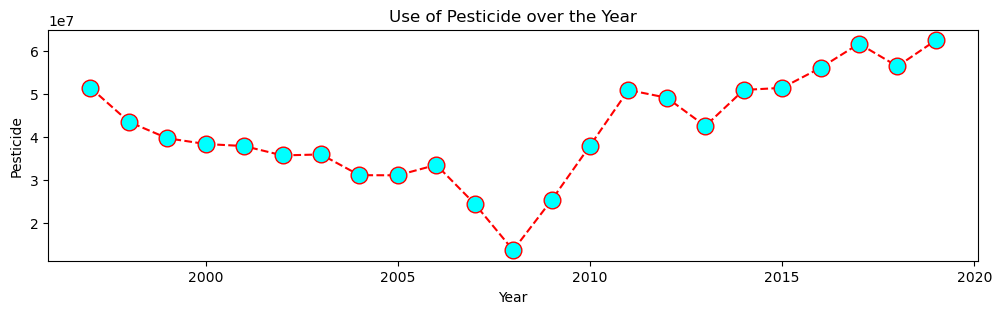

In [18]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Pesticide'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Use of Pesticide over the Year')
plt.show()

In [19]:
df_state = df.groupby('State').sum()
df_state.sort_values(by = 'Yield', inplace=True, ascending = False)
df_state

Crop  \
State                                                                  
West Bengal        ArecanutArhar/TurBajraBarleyCardamomCastor see...   
Puducherry         ArecanutBajraBlack pepperCorianderCotton(lint)...   
Andhra Pradesh     ArecanutArhar/TurArhar/TurBajraBajraBananaCash...   
Tamil Nadu         ArecanutArhar/TurBajraBananaCashewnutCastor se...   
Assam              ArecanutArhar/TurCastor seedCoconut Cotton(lin...   
Karnataka          ArecanutArhar/TurBajraBajraBlack pepperCardamo...   
Kerala             ArecanutBlack pepperCashewnutCoconut TapiocaAr...   
Goa                ArecanutBananaBlack pepperCashewnutCoconut Gro...   
Telangana          Arhar/TurArhar/TurBajraBajraBananaCashewnutCas...   
Gujarat            Arhar/TurBajraBajraBananaCastor seedCastor see...   
Uttar Pradesh      Arhar/TurBajraBarleyCastor seedGramGroundnutJo...   
Haryana            Arhar/TurBajraBarleyCotton(lint)Dry chilliesGr...   
Maharashtra        Arhar/TurBajraCotton(lint)GramJowarJowarMaizeM...   
Bihar              Arhar/TurBajraBananaBarleyCastor seedCoriander...   
Madhya Pradesh     Arhar/TurBajraBarleyCotton(lint)GroundnutJowar...   
Uttarakhand        Arhar/TurBajraBarleyGarlicGramGroundnutHorse-g...   
Delhi              Arhar/TurBajraBarleyGramJowarMaizeOther Kharif...   
Odisha             Arhar/TurArhar/TurArhar/TurGroundnutGroundnutG...   
Nagaland           Arhar/TurBajraCastor seedCotton(lint)GramGroun...   
Manipur            Arhar/TurBananaCashewnutDry chilliesGingerMaiz...   
Punjab             Arhar/TurBajraBarleyCotton(lint)GramGroundnutM...   
Tripura            Arhar/TurCotton(lint)GramGroundnutGroundnutJut...   
Meghalaya          ArecanutArhar/TurBananaCastor seedCotton(lint)...   
Chhattisgarh       Arhar/TurBajraBajraBarleyCastor seedCorianderC...   
Himachal Pradesh   Arhar/TurBajraBarleyCorianderCotton(lint)Dry c...   
Arunachal Pradesh  Arhar/TurDry chilliesGingerGroundnutMaizeMasoo...   
Mizoram            Arhar/TurCoconut GroundnutMaizeMaizePeas & bea...   
Jharkhand          Arhar/TurGramMaizeMasoorPotatoPotatoRagiRapese...   
Jammu and Kashmir  Arhar/TurBarleyGarlicGramLinseedMasoorOnionOth...   
Sikkim             BarleyMaizeMaizeOther  Rabi pulsesRapeseed &Mu...   

                   Crop_Year  \
State                          
West Bengal          2196856   
Puducherry           1346899   
Andhra Pradesh       2543550   
Tamil Nadu           1652030   
Assam                1468138   
Karnataka            2876568   
Kerala               1072892   
Goa                   494067   
Telangana             800319   
Gujarat              1641081   
Uttar Pradesh        1657261   
Haryana              1267508   
Maharashtra          1546539   
Bihar                1799058   
Madhya Pradesh       1697425   
Uttarakhand          1535612   
Delhi                 407560   
Odisha               1525934   
Nagaland             1384791   
Manipur               891535   
Punjab                797278   
Tripura               886679   
Meghalaya            1303721   
Chhattisgarh         1838861   
Himachal Pradesh     1237740   
Arunachal Pradesh     586807   
Mizoram               835617   
Jharkhand             543138   
Jammu and Kashmir    1268456   
Sikkim                453793   

                                                              Season  \
State                                                                  
West Bengal        Whole Year Whole Year Kharif     Whole Year Wh...   
Puducherry         Kharif     Kharif     Kharif     Kharif     Su...   
Andhra Pradesh     Whole Year Kharif     Rabi       Kharif     Ra...   
Tamil Nadu         Whole Year Kharif     Kharif     Whole Year Wh...   
Assam              Whole Year Kharif     Kharif     Whole Year Kh...   
Karnataka          Whole Year Kharif     Kharif     Summer     Kh...   
Kerala             Whole Year Whole Year Whole Year Whole Year Wh...   
Goa                Whole Year Whole Year Whole Year Whole Year Wh...   
Telangana     

In [20]:
df_state['Region'] = ['States' for i in range(len(df_state))]

fig = px.bar(df_state, x='Region', y = 'Yield', color=df_state.index, hover_data=['Yield'])
fig.show()

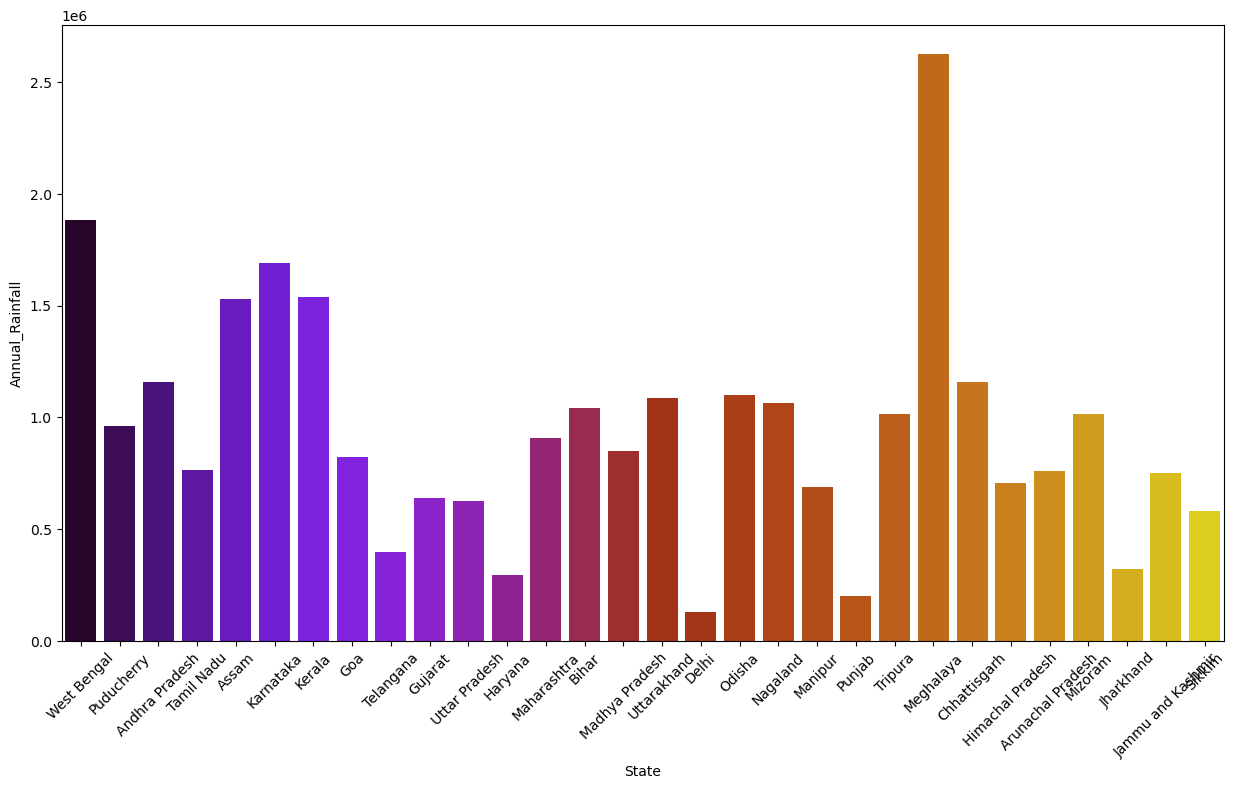

In [21]:
plt.figure(figsize = (15,8))
sns.barplot(x = df_state.index, y=df_state['Annual_Rainfall'], palette = 'gnuplot') 
plt.xticks(rotation = 45)
plt.show()

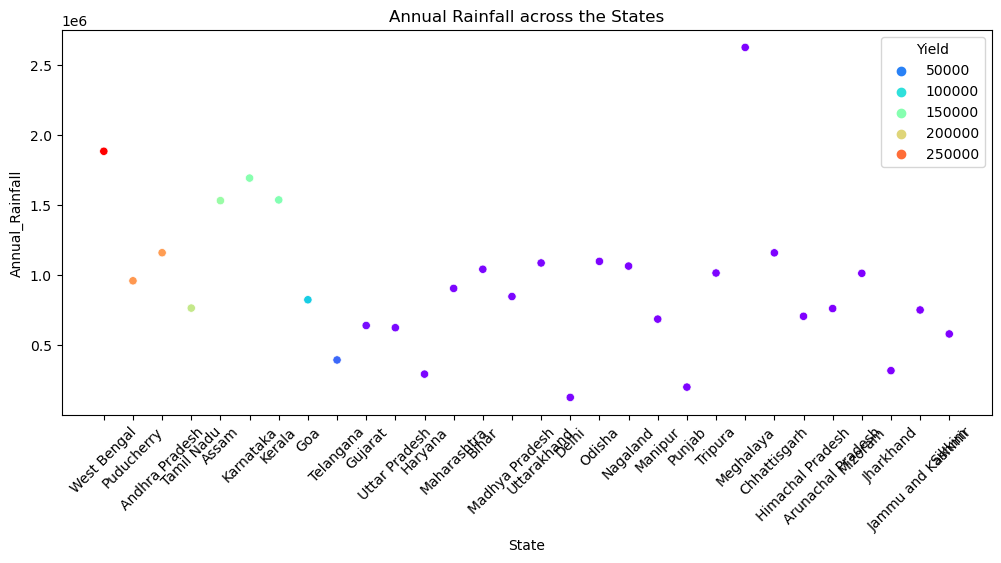

In [22]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_state.index, y = df_state['Annual_Rainfall'], palette='rainbow', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Annual Rainfall across the States')
plt.show()

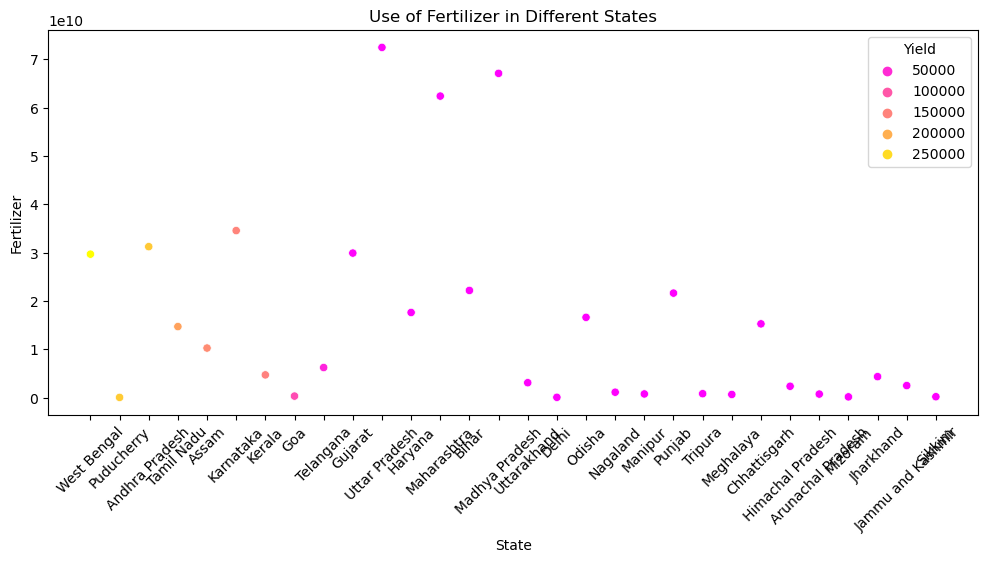

In [23]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_state.index, y=df_state['Fertilizer'], palette='spring', hue = df_state['Yield'])
plt.xticks(rotation=45)
plt.title('Use of Fertilizer in Different States')
plt.show()

In [24]:
df_Seas = df[df['Season']!='Whole Year ']

df_season = df_Seas.groupby('Season').sum()
df_season

Crop  Crop_Year  \
Season                                                                      
Autumn       RiceRagiRiceRiceRiceRiceRiceRiceDry chilliesRi...     832058   
Kharif       Arhar/TurCastor seedCotton(lint)JuteMaizeMesta...   16538965   
Rabi         GramLinseedOther  Rabi pulsesRapeseed &Mustard...   11539594   
Summer       RiceBajraJowarMaizeRagiRiceMoong(Green Gram)Ri...    2402524   
Winter       RiceRiceRiceRiceRiceRiceRicePotatoRiceSesamumR...     781718   

                                                         State          Area  \
Season                                                                         
Autumn       AssamWest BengalWest BengalAssamKeralaWest Ben...  5.862637e+07   
Kharif       AssamAssamAssamAssamAssamAssamAssamAssamKarnat...  1.702742e+09   
Rabi         AssamAssamAssamAssamAssamKarnatakaKarnatakaKar...  1.172588e+09   
Summer       AssamKarnatakaKarnatakaKarnatakaKarnatakaKarna...  9.879112e+07   
Winter       AssamWest BengalAssamKeralaWest BengalAssamKer...  2.806847e+08   

             Production  Annual_Rainfall    Fertilizer     Pesticide  \
Season                                                                 
Autumn         84406651     7.031759e+05  7.696200e+09  1.552829e+07   
Kharif       5402484780     1.131835e+07  2.282723e+11  4.624902e+08   
Rabi         2837368229     7.970757e+06  1.564345e+11  3.218366e+08   
Summer        243731156     1.565900e+06  1.371903e+10  2.732111e+07   
Winter        586507936     6.709910e+05  3.811857e+10  7.590270e+07   

                    Yield  
Season                     
Autumn        1621.837556  
Kharif       20431.840607  
Rabi         11418.068860  
Summer        3581.857123  
Winter        2056.746957

In [25]:
fig = px.bar(df_season, y = 'Area', color=df_season.index, hover_data=['Area'],text = 'Area')
fig.show()

In [26]:
fig = px.sunburst(df_season, path=[df_season.index, 'Yield'], values='Yield',
                  color=df_season.index, hover_data=['Yield'])                
fig.show()

In [27]:
df_yz = df[df['Yield']==0]
df_yz.shape

(112, 10)

In [28]:
df_yz.head()

Crop  Crop_Year       Season           State     Area  \
92          Cardamom       1997  Whole Year      West Bengal   2674.0   
125        Sunflower       1997  Whole Year      West Bengal    278.0   
1058        Soyabean       2002  Kharif       Andhra Pradesh  41284.0   
1134  other oilseeds       2002  Whole Year           Kerala   2253.0   
1135        Arecanut       2002  Whole Year       Tamil Nadu   4956.0   

      Production  Annual_Rainfall  Fertilizer  Pesticide  Yield  
92             7           1852.9   254484.58     828.94    0.0  
125            1           1852.9    26457.26      86.18    0.0  
1058           0            648.1  3908356.28   10321.00    0.0  
1134           0           2511.2   213291.51     563.25    0.0  
1135           0            315.9   469184.52    1239.00    0.0

C:\Users\AMAN SINGH\AppData\Local\Temp\ipykernel_19428\758121924.py:2: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

C:\Users\AMAN SINGH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 2500x1500 with 0 Axes>

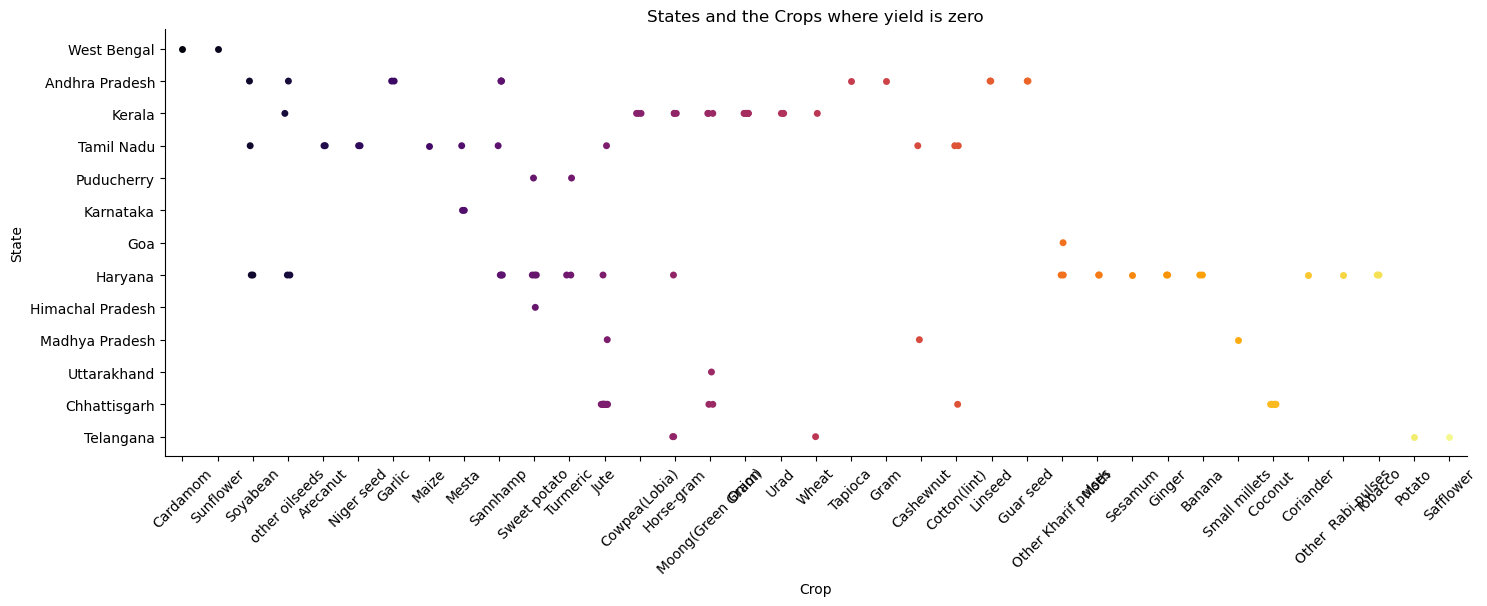

In [29]:
plt.figure(figsize = (25,15))
sns.catplot(y="State", x="Crop",data=df_yz, aspect = 3, palette ='inferno')
plt.xticks(rotation=45)
plt.title('States and the Crops where yield is zero')
plt.show()

In [30]:
df_ynz = df[df['Yield']>0]  # where yield is more than zero
df_crop = df_ynz.groupby('Crop').sum()
df_crop

Crop_Year  \
Crop                               
Arecanut                  321347   
Arhar/Tur                1020541   
Bajra                    1052589   
Banana                    488061   
Barley                    596557   
Black pepper              253163   
Cardamom                  146569   
Cashewnut                 265313   
Castor seed               602681   
Coconut                   331429   
Coriander                 397906   
Cotton(lint)              950038   
Cowpea(Lobia)             263939   
Dry chillies              841584   
Garlic                    498296   
Ginger                    644944   
Gram                      982235   
Groundnut                1456642   
Guar seed                 122657   
Horse-gram                733554   
Jowar                    1030385   
Jute                      333372   
Khesari                   150678   
Linseed                   614576   
Maize                    1956798   
Masoor                    651141   
Mesta                     415840   
Moong(Green Gram)        1474944   
Moth                      216986   
Niger seed                381651   
Oilseeds total             58267   
Onion                     898283   
Other  Rabi pulses        711285   
Other Cereals             293632   
Other Kharif pulses       761491   
Other Summer Pulses        20174   
Peas & beans (Pulses)     741588   
Potato                   1259981   
Ragi                     1000539   
Rapeseed &Mustard        1060590   
Rice                     2404601   
Safflower                 337522   
Sannhamp                  307237   
Sesamum                  1374333   
Small millets             972398   
Soyabean                  693309   
Sugarcane                1215012   
Sunflower                 883991   
Sweet potato              538489   
Tapioca                   401856   
Tobacco                   727369   
Turmeric                  670990   
Urad                     1467057   
Wheat                    1090684   
other oilseeds            245408   

                                                                  Season  \
Crop                                                                       
Arecanut               Whole Year Whole Year Whole Year Whole Year Wh...   
Arhar/Tur              Kharif     Kharif     Kharif     Whole Year Kh...   
Bajra                  Kharif     Summer     Kharif     Kharif     Kh...   
Banana                 Whole Year Whole Year Whole Year Whole Year Wh...   
Barley                 Whole Year Rabi       Rabi       Rabi       Ra...   
Black pepper           Kharif     Whole Year Kharif     Whole Year Wh...   
Cardamom               Whole Year Whole Year Whole Year Whole Year Wh...   
Cashewnut              Whole Year Whole Year Whole Year Whole Year Wh...   
Castor seed            Kharif     Rabi       Whole Year Kharif     Kh...   
Coconut                Whole Year Whole Year Whole Year Whole Year Wh...   
Coriander              Whole Year Kharif     Whole Year Whole Year Wh...   
Cotton(lint)           Kharif     Kharif     Kharif     Summer     Kh...   
Cowpea(Lobia)          Kharif     Rabi       Kharif     Rabi       Kh...   
Dry chillies           Whole Year Kharif     Rabi       Whole Year Wh...   
Garlic                 Whole Year Whole Year Whole Year Whole Year Wh...   
Ginger                 Kharif     Kharif     Kharif     Whole Year Kh...   
Gram                   Rabi       Rabi       Rabi       Rabi       Ra...   
Groundnut              Kharif     Rabi       Whole Year Rabi       Kh...   
Guar seed              Rabi       Whole Year Whole Year Whole Year Wh...   
Horse-gram             Kharif     Rabi       Kharif     Kharif     Ra...   
Jowar                  Kharif     Rabi       Summer     Whole Year Kh...   
Jute                   Kharif     Kharif     Kharif     Kharif     Kh...   
Khesari                Rabi       Rabi       Rabi       Rabi       Ra...   
Linseed                Rabi       Kharif     Whole Year Rabi       Ra.

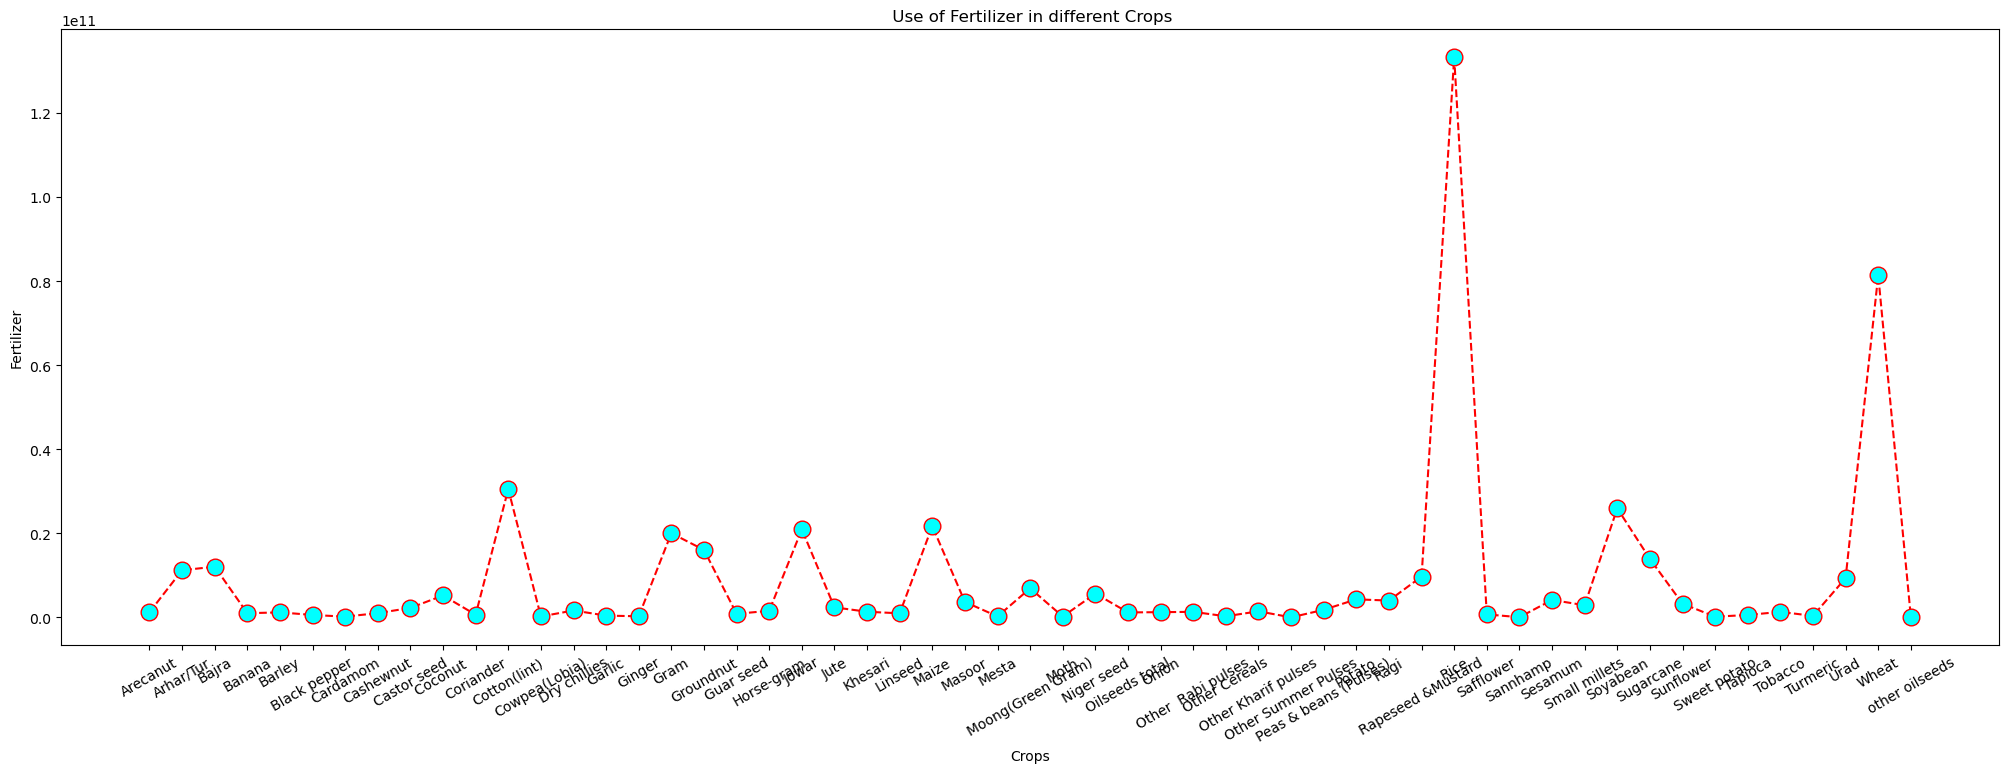

In [31]:
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Fertilizer'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Crops')
plt.ylabel('Fertilizer')
plt.title(' Use of Fertilizer in different Crops')
plt.xticks(rotation=30)
plt.show()

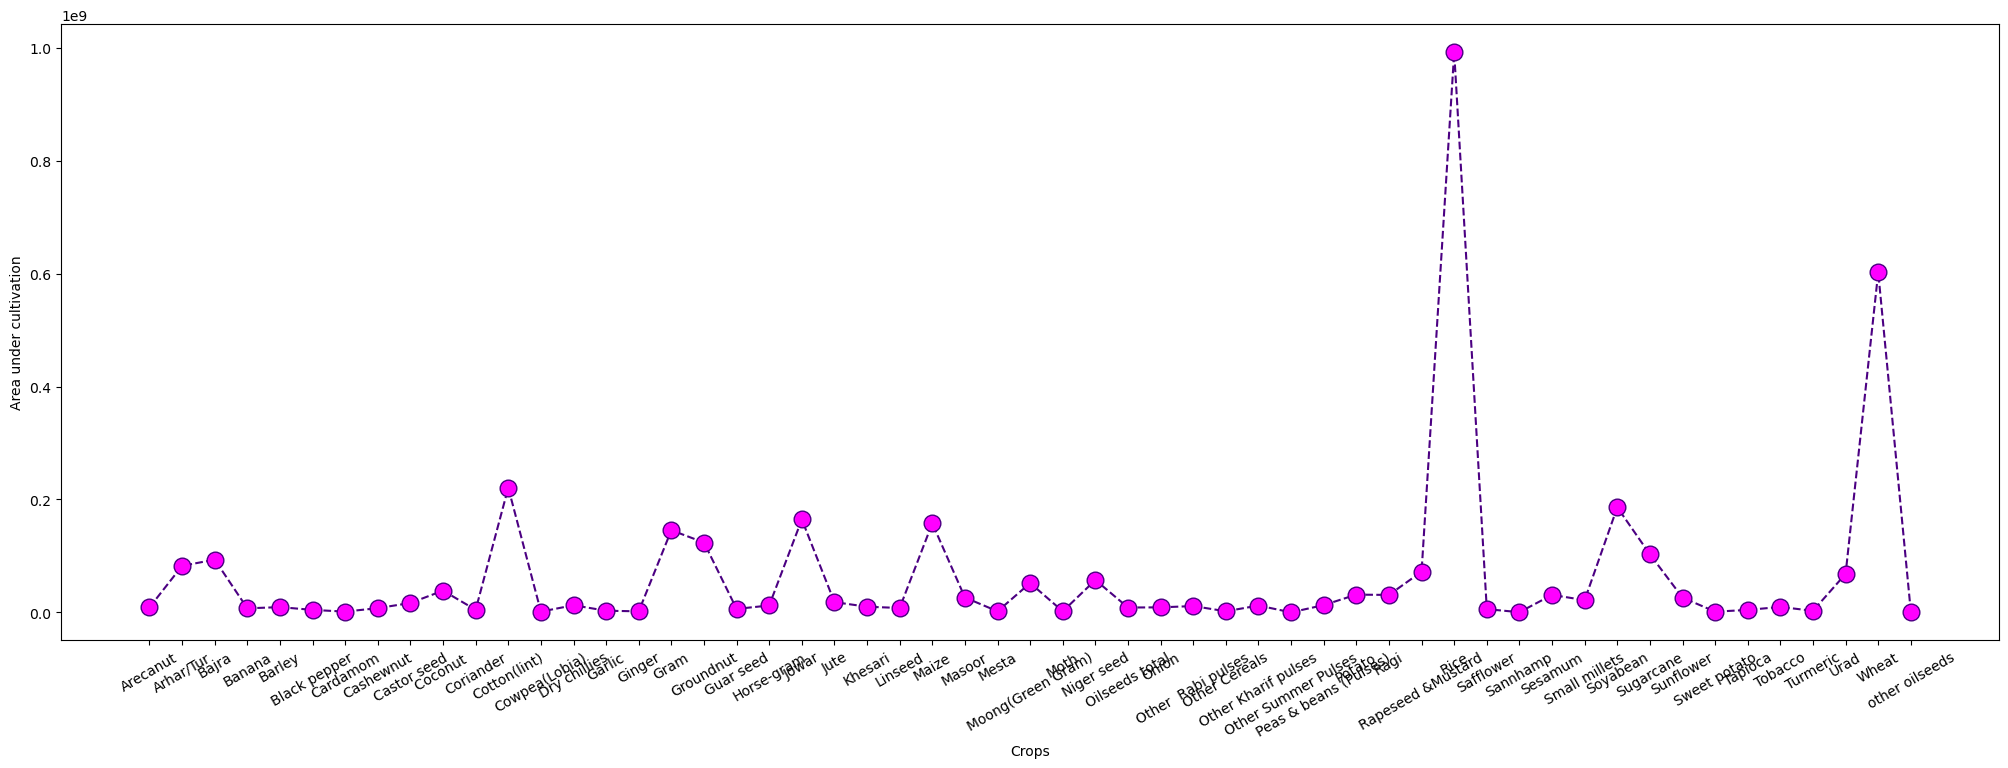

In [32]:
plt.figure(figsize = (25,8))
plt.plot(df_crop.index, df_crop['Area'],color='indigo', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='fuchsia')
plt.xlabel('Crops')
plt.ylabel('Area under cultivation')
plt.xticks(rotation=30)
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [37]:
category_columns = df.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [39]:
df = pd.get_dummies(df, columns = category_columns, drop_first=True)

In [40]:
df.shape

(19689, 95)

In [41]:
df.head()

Crop_Year     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0       1997  73814.0       56708           2051.4  7024878.38   22882.34   
1       1997   6637.0        4685           2051.4   631643.29    2057.47   
2       1997    796.0          22           2051.4    75755.32     246.76   
3       1997  19656.0   126905000           2051.4  1870661.52    6093.36   
4       1997   1739.0         794           2051.4   165500.63     539.09   

         Yield  Crop_Arhar/Tur  Crop_Bajra  Crop_Banana  ...  State_Odisha  \
0     0.796087           False       False        False  ...         False   
1     0.710435            True       False        False  ...         False   
2     0.238333           False       False        False  ...         False   
3  5238.051739           False       False        False  ...         False   
4     0.420909           False       False        False  ...         False   

   State_Puducherry  State_Punjab  State_Sikkim  State_Tamil Nadu  \
0             False         False         False             False   
1             False         False         False             False   
2             False         False         False             False   
3             False         False         False             False   
4             False         False         False             False   

   State_Telangana  State_Tripura  State_Uttar Pradesh  State_Uttarakhand  \
0            False          False                False              False   
1            False          False                False              False   
2            False          False                False              False   
3            False          False                False              False   
4            False          False                False              False   

   State_West Bengal  
0              False  
1              False  
2              False  
3              False  
4              False  

[5 rows x 95 columns]

In [42]:
x = df.drop(['Yield'], axis = 1)
y = df[['Yield']]

In [43]:
print(x.shape)
y.shape

(19689, 94)


(19689, 1)

In [44]:
x.head()

Crop_Year     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0       1997  73814.0       56708           2051.4  7024878.38   22882.34   
1       1997   6637.0        4685           2051.4   631643.29    2057.47   
2       1997    796.0          22           2051.4    75755.32     246.76   
3       1997  19656.0   126905000           2051.4  1870661.52    6093.36   
4       1997   1739.0         794           2051.4   165500.63     539.09   

   Crop_Arhar/Tur  Crop_Bajra  Crop_Banana  Crop_Barley  ...  State_Odisha  \
0           False       False        False        False  ...         False   
1            True       False        False        False  ...         False   
2           False       False        False        False  ...         False   
3           False       False        False        False  ...         False   
4           False       False        False        False  ...         False   

   State_Puducherry  State_Punjab  State_Sikkim  State_Tamil Nadu  \
0             False         False         False             False   
1             False         False         False             False   
2             False         False         False             False   
3             False         False         False             False   
4             False         False         False             False   

   State_Telangana  State_Tripura  State_Uttar Pradesh  State_Uttarakhand  \
0            False          False                False              False   
1            False          False                False              False   
2            False          False                False              False   
3            False          False                False              False   
4            False          False                False              False   

   State_West Bengal  
0              False  
1              False  
2              False  
3              False  
4              False  

[5 rows x 94 columns]

In [45]:
y.head()

Yield
0     0.796087
1     0.710435
2     0.238333
3  5238.051739
4     0.420909

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [47]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((15751, 94), (3938, 94), (15751, 1), (3938, 1))

In [48]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

x_train_transform1 = pt.fit_transform(x_train)
x_test_transform1 = pt.fit_transform(x_test)

C:\Users\AMAN SINGH\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning:

overflow encountered in multiply

C:\Users\AMAN SINGH\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning:

overflow encountered in multiply



In [49]:
df_trans = pd.DataFrame(x_train_transform1, columns=x_train.columns)
df_trans.head()

Crop_Year      Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0   0.251370 -1.075788   -0.715962         1.907533   -1.006257  -1.017955   
1  -0.365606 -1.522011   -1.187932        -1.238092   -1.515720  -1.679552   
2  -1.494427 -1.239694   -1.428779        -0.699476   -1.300878  -1.248039   
3   0.738806  0.247029    0.197346         0.054274    0.286890   0.336490   
4  -1.086844  1.485555    0.978650        -0.898001    1.350606   1.458014   

   Crop_Arhar/Tur  Crop_Bajra  Crop_Banana  Crop_Barley  ...  State_Odisha  \
0       -0.161629   -0.166525    -0.110204    -0.125699  ...     -0.199345   
1       -0.161629   -0.166525    -0.110204     7.955488  ...     -0.199345   
2       -0.161629   -0.166525    -0.110204    -0.125699  ...     -0.199345   
3       -0.161629   -0.166525    -0.110204     7.955488  ...     -0.199345   
4       -0.161629   -0.166525    -0.110204    -0.125699  ...     -0.199345   

   State_Puducherry  State_Punjab  State_Sikkim  State_Tamil Nadu  \
0         -0.186237     -0.141458     -0.111086         -0.210283   
1         -0.186237     -0.141458     -0.111086         -0.210283   
2         -0.186237     -0.141458     -0.111086         -0.210283   
3         -0.186237     -0.141458     -0.111086         -0.210283   
4         -0.186237     -0.141458     -0.111086         -0.210283   

   State_Telangana  State_Tripura  State_Uttar Pradesh  State_Uttarakhand  \
0        -0.145149      -0.151629            -0.211269          -0.202084   
1        -0.145149      -0.151629            -0.211269          -0.202084   
2        -0.145149      -0.151629             4.733303          -0.202084   
3        -0.145149      -0.151629            -0.211269           4.948440   
4        -0.145149      -0.151629            -0.211269          -0.202084   

   State_West Bengal  
0          -0.241057  
1          -0.241057  
2          -0.241057  
3          -0.241057  
4          -0.241057  

[5 rows x 94 columns]

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred_train = lr.predict(x_train)
print("Training Accuracy : ",r2_score(y_train,y_pred_train))

y_pred_test = lr.predict(x_test)
print("Test Accuracy : ",r2_score(y_test,y_pred_test))

Training Accuracy :  0.8529095192575167
Test Accuracy :  0.8022291019988645


In [51]:
train_accu = []
test_accu = []

In [52]:
lr.fit(x_train_transform1, y_train)

y_pred_train_ = lr.predict(x_train_transform1)
y_pred_test_ = lr.predict(x_test_transform1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_))
print()
print("Test Accuracy : ",r2_score(y_test, y_pred_test_))

train_accu.append(r2_score(y_train,y_pred_train_))
test_accu.append(r2_score(y_test,y_pred_test_))

Training Accuracy :  0.8568213775029195

Test Accuracy :  0.820151824942839


In [53]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

regr.fit(x_train_transform1, y_train)

y_pred_train_regr= regr.predict(x_train_transform1)
y_pred_test_regr = regr.predict(x_test_transform1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_regr))
print("Test Accuracy : ",r2_score(y_test, y_pred_test_regr))

train_accu.append(r2_score(y_train,y_pred_train_regr))
test_accu.append(r2_score(y_test,y_pred_test_regr))

C:\Users\AMAN SINGH\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training Accuracy :  0.9969994412094055
Test Accuracy :  0.982144882270607


In [54]:
algorithm = ['LinearRegression','RandomForestRegressor',]
accu_data = {'Training Accuracy':train_accu,'Test Accuracy':test_accu}
model = pd.DataFrame(accu_data, index = algorithm)
model

Training Accuracy  Test Accuracy
LinearRegression                0.856821       0.820152
RandomForestRegressor           0.996999       0.982145

In [56]:
df.head()

Crop_Year     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0       1997  73814.0       56708           2051.4  7024878.38   22882.34   
1       1997   6637.0        4685           2051.4   631643.29    2057.47   
2       1997    796.0          22           2051.4    75755.32     246.76   
3       1997  19656.0   126905000           2051.4  1870661.52    6093.36   
4       1997   1739.0         794           2051.4   165500.63     539.09   

         Yield  Crop_Arhar/Tur  Crop_Bajra  Crop_Banana  ...  State_Odisha  \
0     0.796087           False       False        False  ...         False   
1     0.710435            True       False        False  ...         False   
2     0.238333           False       False        False  ...         False   
3  5238.051739           False       False        False  ...         False   
4     0.420909           False       False        False  ...         False   

   State_Puducherry  State_Punjab  State_Sikkim  State_Tamil Nadu  \
0             False         False         False             False   
1             False         False         False             False   
2             False         False         False             False   
3             False         False         False             False   
4             False         False         False             False   

   State_Telangana  State_Tripura  State_Uttar Pradesh  State_Uttarakhand  \
0            False          False                False              False   
1            False          False                False              False   
2            False          False                False              False   
3            False          False                False              False   
4            False          False                False              False   

   State_West Bengal  
0              False  
1              False  
2              False  
3              False  
4              False  

[5 rows x 95 columns]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Crop_Year                   19689 non-null  int64  
 1   Area                        19689 non-null  float64
 2   Production                  19689 non-null  int64  
 3   Annual_Rainfall             19689 non-null  float64
 4   Fertilizer                  19689 non-null  float64
 5   Pesticide                   19689 non-null  float64
 6   Yield                       19689 non-null  float64
 7   Crop_Arhar/Tur              19689 non-null  bool   
 8   Crop_Bajra                  19689 non-null  bool   
 9   Crop_Banana                 19689 non-null  bool   
 10  Crop_Barley                 19689 non-null  bool   
 11  Crop_Black pepper           19689 non-null  bool   
 12  Crop_Cardamom               19689 non-null  bool   
 13  Crop_Cashewnut              196

In [60]:
scaler = StandardScaler()

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [63]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [65]:
df = pd.read_csv(r"C:\Users\AMAN SINGH\Downloads\crop_yield.csv")

In [66]:
df.head()

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909

In [67]:
X = df.drop(columns=['Crop', 'Season', 'State'])

In [68]:
X.fillna(X.mean(), inplace=True)

In [69]:
scaler = StandardScaler()

In [73]:
X_scaled = scaler.fit_transform(X)

In [74]:
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

In [78]:
X_scaled = scaler.fit_transform(X)

In [80]:
y_kmeans = kmeans.fit_predict(X_scaled)

C:\Users\AMAN SINGH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [81]:
df['KMeans_Cluster'] = y_kmeans

In [82]:
print(df.head())

           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  KMeans_Cluster  
0           2051.4  7024878.38   22882.34     0.796087               0  
1           2051.4   631643.29    2057.47     0.710435               0  
2           2051.4    75755.32     246.76     0.238333               0  
3           2051.4  1870661.52    6093.36  5238.051739               0  
4           2051.4   165500.63     539.09     0.420909               0  


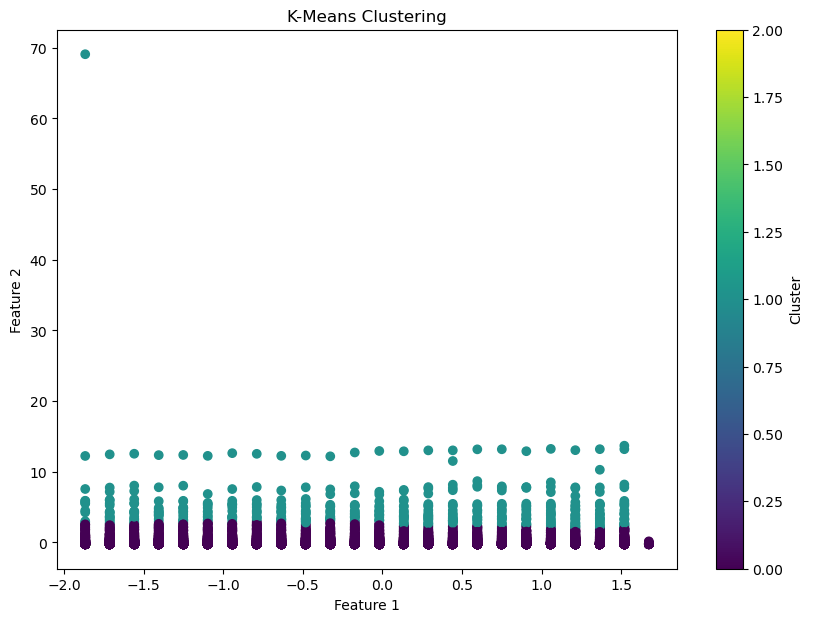

In [83]:
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster')
plt.show()